In [148]:
import kagglehub
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
df_train = pd.read_csv('/Users/kimliya/Desktop/Intern_Prodigy/ML/Task01_LR/train.csv')
df_test = pd.read_csv('/Users/kimliya/Desktop/Intern_Prodigy/ML/Task01_LR/test.csv')

In [150]:
df_train.head()
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Processing Data

In [151]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [152]:
# shows columns of dataset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [153]:
df_train.shape

(1460, 81)

In [154]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [155]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [156]:
# skewness of data
df_train.skew(numeric_only=True)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

**Skewness tells us about the symmetry in a distribution.**
- If Skewness is equal to zero , It is a symmetrical distribution.
- And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
- If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.

In our above data,
- LotArea
- LowQualFinSF
- SsnPorchPoolArea
- MiscVal

**Are highly positively,right skewed.**

In [157]:
#We'll be applying the same changes to df and test dataset.

features_to_change = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageCars']

int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in int_to_object:
 df_train[feature] = df_train[feature].astype(object)
df_test[feature] = df_test[feature].astype(object)

In [158]:
#Drop Id column as it is not required
# axis = 1 means we implement it in columns , axis = 0 in raws 
# implace = True means drop it in original data do not make a copy version and drop , inplace = False means making a copy of object and drop
df_train.drop(columns=['Id'],axis=1,inplace=True)
df_test.drop(columns =['Id'] , axis=1,inplace=True)

## Missing Values of data train

In [159]:
## Missing Values
df_train.isna().sum().sum()

7829

In [160]:
missing = df_train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [161]:
# Create a DataFrame showing each column and its number of missing values
# 1) temp: list of missing counts per column
# 2) lst: list of [column_name, missing_count] pairs
# 3) temp_df: DataFrame from lst with columns ['Column_Name','Missing_Values']

temp = list(df_train.isna().sum())
lst = []
i = 0  # index to match each column name with its corresponding missing value count in 'temp' 
for column in df_train.columns:
    tem_pair = [column,temp[i]]
    lst.append(tem_pair)
    i+=1 # increment to move to next missing value count

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [162]:
import plotly.express as px
fig = px.bar(
    temp_df.sort_values(by='Missing_Values'),  # sort columns by missing values
    x='Missing_Values',                        
    y='Column_Name',                            
    orientation='h',                            # (horizontal bar)
    height=1500, width=900,                     # dimentions
    color='Missing_Values',                     
    text='Missing_Values',                      
    title='Missing values in train dataset'     # عنوان الرسم البياني
)
fig.update_traces(textposition='outside')       # make text outside the columns 
fig.show() 

In [163]:
# Show columns with missing values only, sorted by number of missing values (descending),
# reset row index, and apply red color gradient for visualization (darker red = more missing)

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,MasVnrType,872
5,FireplaceQu,690
6,LotFrontage,259
7,GarageType,81
8,GarageYrBlt,81
9,GarageFinish,81


## Handle data train

In [164]:
# Fill numerical missing values with median
num_cols = df_train.select_dtypes(include=np.number).columns
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df_train.select_dtypes(include='object').columns
df_train[cat_cols] = df_train[cat_cols].fillna(df_train[cat_cols].mode().iloc[0])


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/94927852.py:7: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [165]:
df_train.isna().sum().sum()

0

## Missing values data test

In [166]:
df_test.isna().sum().sum()

7878

In [167]:
temp = list(df_test.isna().sum())
lst =[]
i=0

for column in df_test.columns:
    tem_pair = [column,temp[i]]
    lst.append(tem_pair)
    i+=1

temp_df = pd.DataFrame(data=lst,columns = ['Column_Name','Missing_Values'])

In [168]:
temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,MasVnrType,894
5,FireplaceQu,730
6,LotFrontage,227
7,GarageCond,78
8,GarageYrBlt,78
9,GarageQual,78


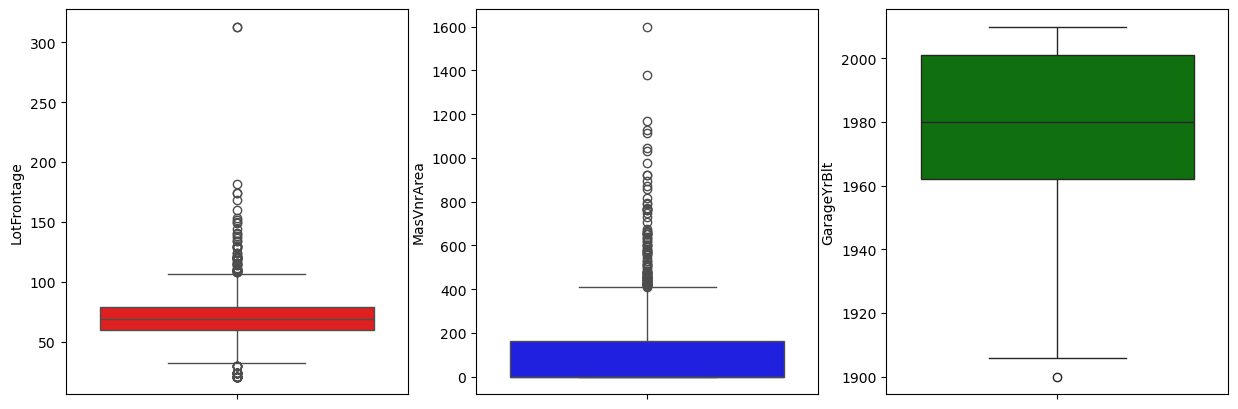

In [169]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))

features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = df_train[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [170]:
# Fill numerical missing values with median
num_cols = df_test.select_dtypes(include=np.number).columns
df_test[num_cols] = df_test[num_cols].fillna(df_test[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df_test.select_dtypes(include='object').columns
df_test[cat_cols] = df_test[cat_cols].fillna(df_test[cat_cols].mode().iloc[0])


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/1503511632.py:7: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [171]:
df_test.isna().sum().sum()

0

## Feature and Target cols

In [172]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [173]:
target = df_train["SalePrice"]

In [174]:
features_to_examine

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [175]:
# Create a figure with 1 row and 2 columns for subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

# Add a Histogram to visualize the distribution of SalePrice
# This plot shows how house prices are distributed and helps identify skewness
fig.add_trace(
    go.Histogram(x=df_train['SalePrice']),
    row=1,  # First row
    col=1   # First column (left plot)
)

# Add a Box Plot to visualize median, spread, and outliers of SalePrice
# boxpoints='all' displays all data points for better understanding of density
fig.add_trace(
    go.Box(
        y=df_train['SalePrice'],
        boxpoints='all',
        line_color='orange'
    ),
    row=1,  # First row
    col=2   # Second column (right plot)
)

# Update the overall layout of the figure
fig.update_layout(
    height=500,                      # Set figure height
    showlegend=False,                # Hide legend
    title_text="Sale Price Distribution and Box Plot"  # Figure title
)

In [176]:
discrete = []
for col in df_train.columns:
    if df_train[col].dtype=='int64' and len(df_train[col].unique()) <=15:
        discrete.append(col)
        
print("Discrete Features :: \n\n {}".format(discrete))

Discrete Features :: 

 ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/1471835754.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/1471835754.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/1471835754.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/g7/wwql1txs12vfb0164n1dlzt80000gn/T/ipykernel_5402/1471835754.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

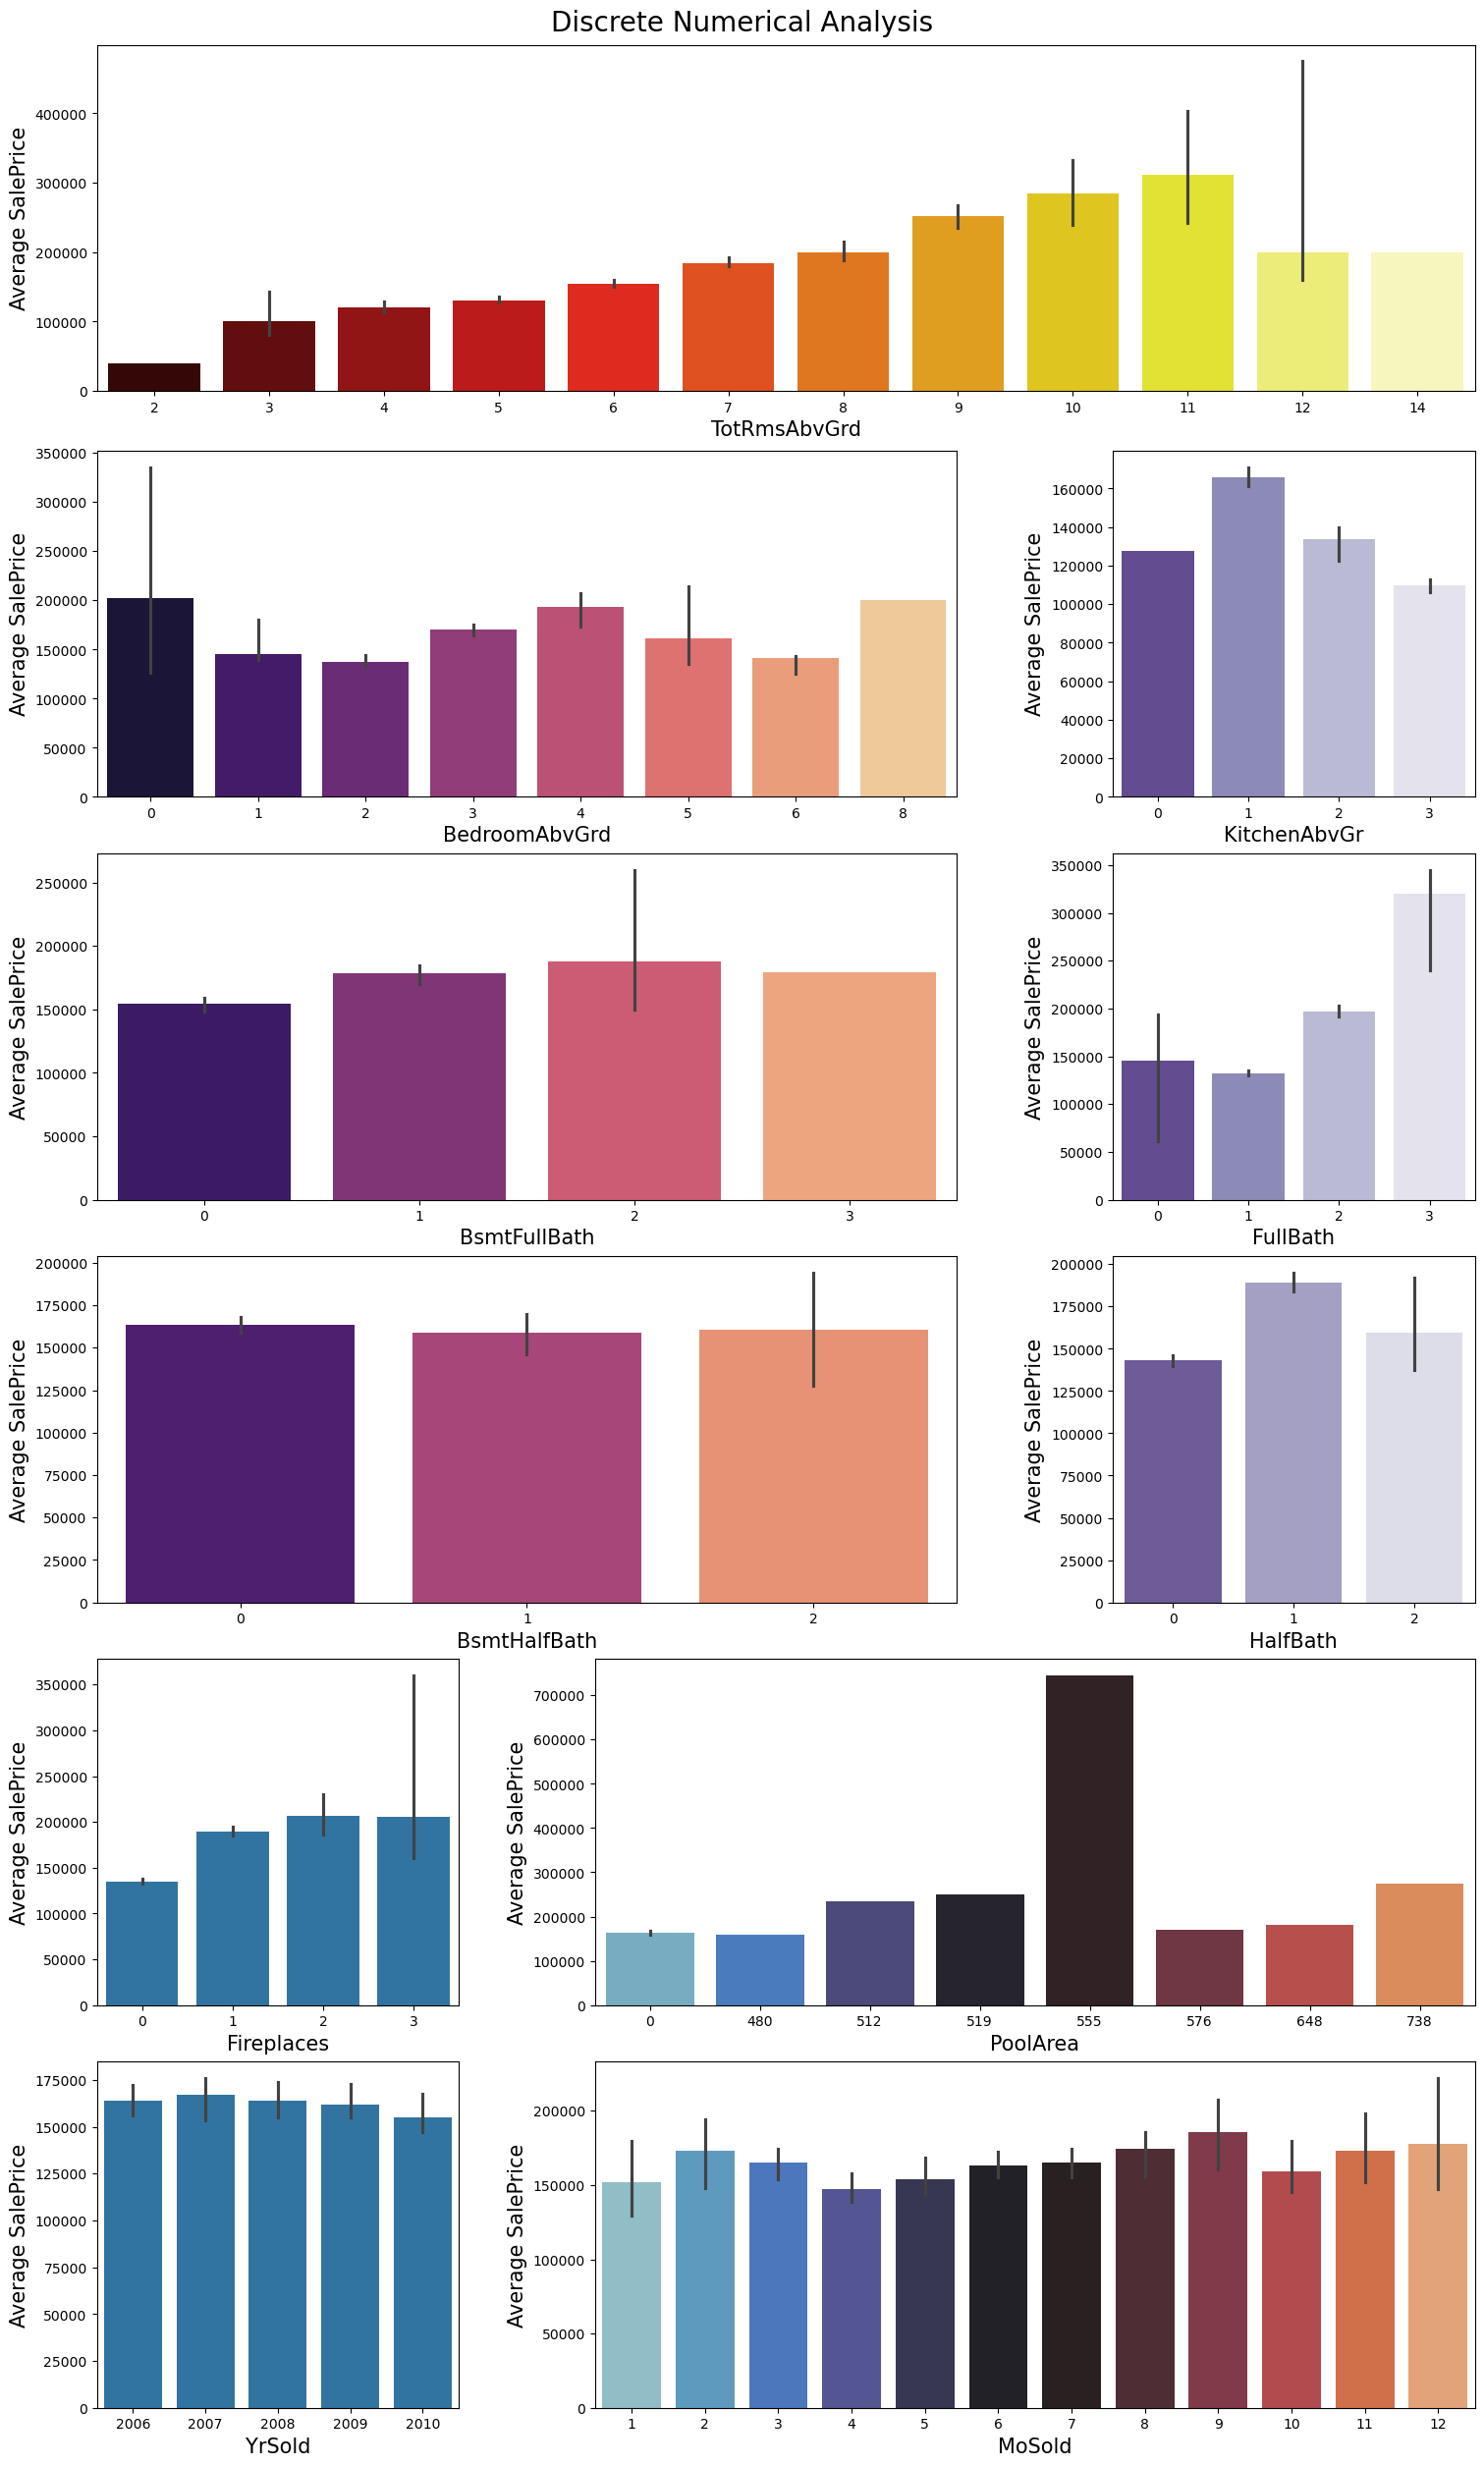

In [177]:
from numpy import median
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=df_train,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=df_train,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=df_train,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=df_train,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=df_train,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)
plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=df_train,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=df_train,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=df_train,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=df_train,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=df_train,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=df_train,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis",fontsize=20);

In [178]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them later.
num = []

for col in df_train.columns:
    if df_train[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


<Axes: >

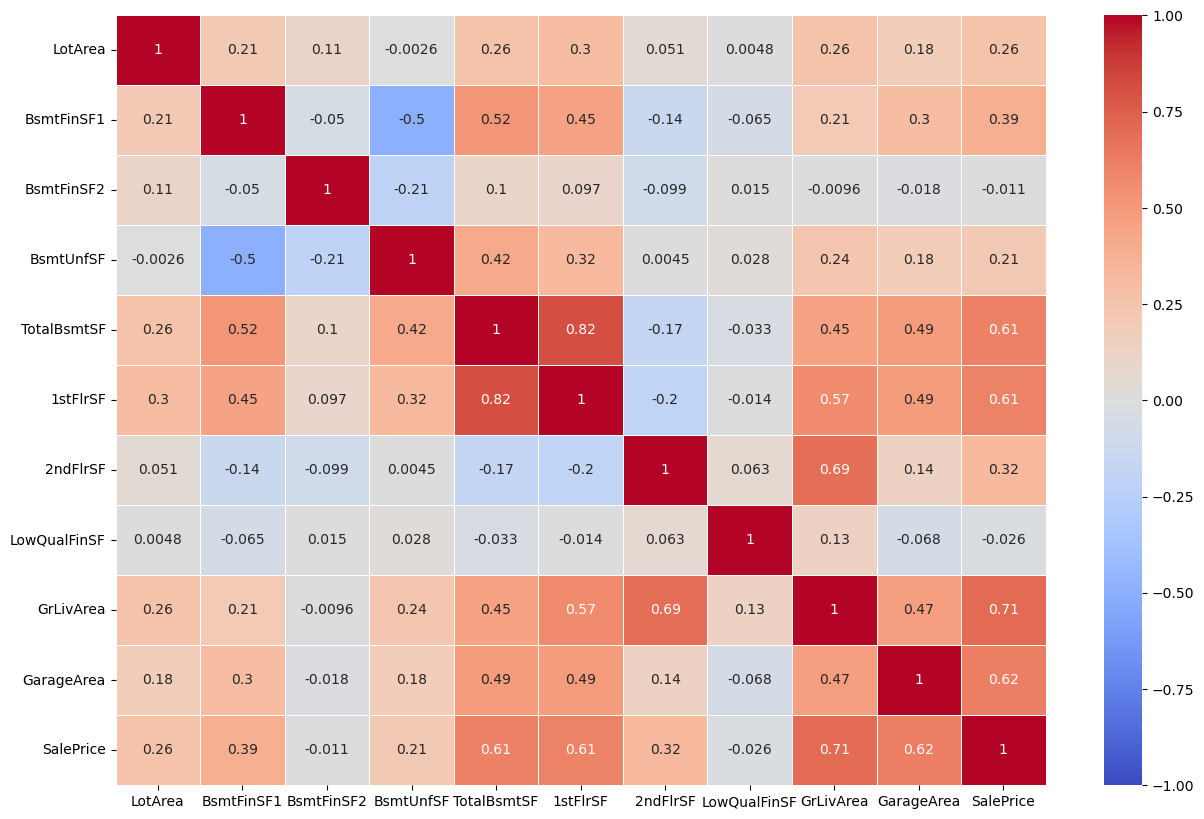

In [179]:
# Select the first 10 numerical features from the dataset
# num contains the list of numerical columns
# iloc[:, 0:10] means: take all rows and only the first 10 columns
df_corr = df_train[num].iloc[:, 0:10]

# Add the target variable (SalePrice) to the selected numerical features
# This allows us to analyze the correlation between features and the target
df_corr['SalePrice'] = df_train['SalePrice']
# Calculate the correlation matrix
# This computes the pairwise correlation between all columns
# The values range from -1 (strong negative) to +1 (strong positive)
corr = df_corr.corr()

# Create a figure for the heatmap with a suitable size
# A larger size helps make the labels and values more readable
fig = plt.figure(figsize=(15,10))

# Plot the heatmap to visualize the correlation matrix
sns.heatmap(
    corr,                 # Correlation matrix data
    annot=True,           # Display correlation values inside each cell
    linewidths=.5,        # Add lines between cells for better separation
    cmap='coolwarm',      # Color map: blue for negative, red for positive correlation
    vmin=-1,              # Minimum value for the color scale
    vmax=1,               # Maximum value for the color scale
    center=0              # Center the color map at zero (no correlation)
)

# The heatmap helps identify which numerical features

In [182]:
data = df_train[features_to_examine + ['SalePrice']].dropna()

## Train and Split data

In [185]:
X = data[features_to_examine]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [186]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model Evaluation

In [187]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 62606.88034142793
R² Score: 0.48898894776949964


In [188]:
coefficients = pd.DataFrame({
    "Feature": features_to_examine,
    "Coefficient": model.coef_
})

print(coefficients)
print("Intercept:", model.intercept_)


       Feature  Coefficient
0  LotFrontage   780.570495
1   MasVnrArea   145.062431
2  GarageYrBlt  1193.063434
Intercept: -2249004.892875146


## Test a sample prediction

In [190]:
# Example: Create a sample house with all required features
sample_house = pd.DataFrame({
    "LotFrontage": [70],
    "MasVnrArea": [200],
    "GarageYrBlt": [2000]
})

predicted_price = model.predict(sample_house)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 220774.39690208668
